In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import xlrd

In [6]:
import os

names = ['Kedaton (Demplot)',
         'Kedaton',
         'Padang Sugihan 1 (SM)',
         'Padang Sugihan 2 (SM)',
         'Padang Sugihan 3 (SM)',
         'Air Rumbai',
         'Cinta Jaya 1',
         'Cinta Jaya 2',
         'Cinta Jaya 3',
         'Muara Medak 1',
         'Muara Medak 2',
         'Karang agung']

# for name in names:
#     os.mkdir("impute/" + name)

# Read data (Example: Cinta Jaya 1)

In [58]:
location = "Cinta Jaya 1"
df = pd.read_pickle("anomaly/" + location + ".pkl")
df

,location,date,rain,soil,gwl,temp,anomaly
0,Cinta Jaya 1,2018-11-10 11:40:00,0.4,3.2,NaN,30.7,1
1,Cinta Jaya 1,2018-11-10 11:50:00,0.0,3.2,NaN,30.7,1
2,Cinta Jaya 1,2018-11-10 12:00:00,0.0,3.2,NaN,30.7,1
3,Cinta Jaya 1,2018-11-10 12:10:00,0.0,3.2,NaN,31.1,1
4,Cinta Jaya 1,2018-11-10 12:20:00,0.0,3.2,NaN,31.1,1
...,...,...,...,...,...,...,...
53319,Cinta Jaya 1,2020-01-10 02:00:00,0.0,29.0,-0.876,29.5,0
53320,Cinta Jaya 1,2020-01-10 02:10:00,0.0,29.0,-0.886,29.5,0
53321,Cinta Jaya 1,2020-01-10 02:20:00,0.0,29.0,-0.881,29.5,0
53322,Cinta Jaya 1,2020-01-10 02:30:00,0.0,28.6,-0.878,29.5,0


In [59]:
df.isna().sum()

location      0
date          0
rain          3
soil          0
gwl         233
temp          0
anomaly       0
dtype: int64

In [60]:
df = df.drop(['anomaly', 'location'], axis=1)
df

,date,rain,soil,gwl,temp
0,2018-11-10 11:40:00,0.4,3.2,NaN,30.7
1,2018-11-10 11:50:00,0.0,3.2,NaN,30.7
2,2018-11-10 12:00:00,0.0,3.2,NaN,30.7
3,2018-11-10 12:10:00,0.0,3.2,NaN,31.1
4,2018-11-10 12:20:00,0.0,3.2,NaN,31.1
...,...,...,...,...,...
53319,2020-01-10 02:00:00,0.0,29.0,-0.876,29.5
53320,2020-01-10 02:10:00,0.0,29.0,-0.886,29.5
53321,2020-01-10 02:20:00,0.0,29.0,-0.881,29.5
53322,2020-01-10 02:30:00,0.0,28.6,-0.878,29.5


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53324 entries, 0 to 53323
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    53324 non-null  datetime64[ns]
 1   rain    53321 non-null  float64       
 2   soil    53324 non-null  float64       
 3   gwl     53091 non-null  float64       
 4   temp    53324 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.0 MB


In [21]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report')
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [62]:
df = df.set_index('date')
df

,rain,soil,gwl,temp
date,,,,
2018-11-10 11:40:00,0.4,3.2,NaN,30.7
2018-11-10 11:50:00,0.0,3.2,NaN,30.7
2018-11-10 12:00:00,0.0,3.2,NaN,30.7
2018-11-10 12:10:00,0.0,3.2,NaN,31.1
2018-11-10 12:20:00,0.0,3.2,NaN,31.1
...,...,...,...,...
2020-01-10 02:00:00,0.0,29.0,-0.876,29.5
2020-01-10 02:10:00,0.0,29.0,-0.886,29.5
2020-01-10 02:20:00,0.0,29.0,-0.881,29.5


# Data Imputation

## LOCF

In [23]:
locf = df.ffill()
locf = df.bfill()
locf.isna().sum()

rain    0
soil    0
gwl     0
temp    0
dtype: int64

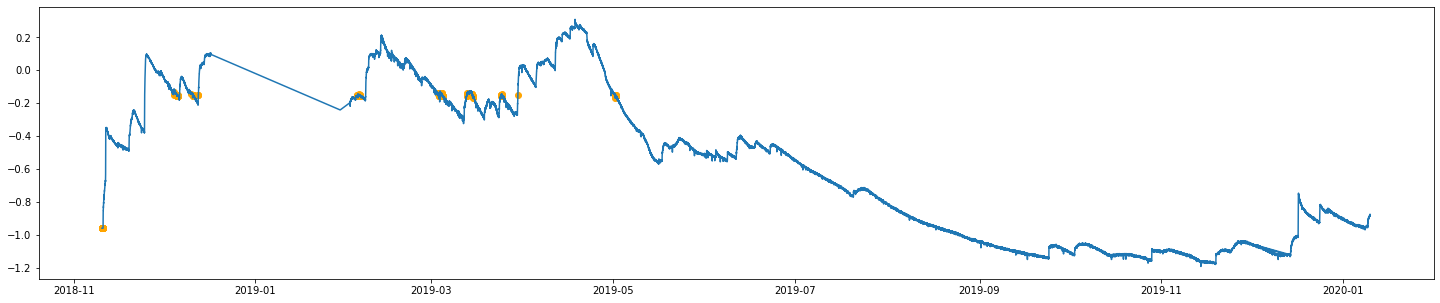

In [79]:
plt.figure(figsize=(25,5))
plt.plot(locf['gwl'])
plt.scatter(df[df['gwl'].isnull()].index, locf.loc[df[df['gwl'].isnull()].index]['gwl'], color='orange')

## NOCB

In [80]:
nocb = df.bfill()
nocb.isna().sum()

rain    0
soil    0
gwl     0
temp    0
dtype: int64

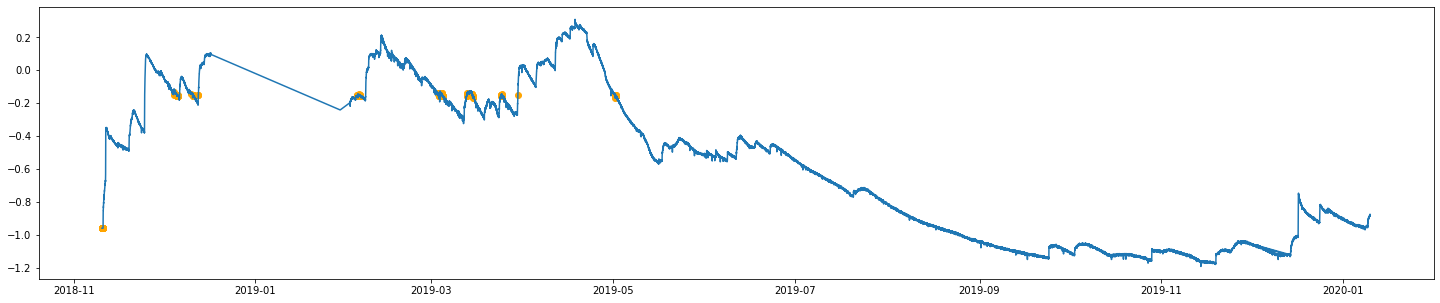

In [81]:
plt.figure(figsize=(25,5))
plt.plot(nocb['gwl'])
plt.scatter(df[df['gwl'].isnull()].index, nocb.loc[df[df['gwl'].isnull()].index]['gwl'], color='orange')

## Interpolation

### Linear

In [86]:
inter_linear = df.interpolate(method='linear')
inter_linear = df.interpolate(method='linear', limit_direction='backward')
inter_linear.isna().sum()

rain    0
soil    0
gwl     0
temp    0
dtype: int64

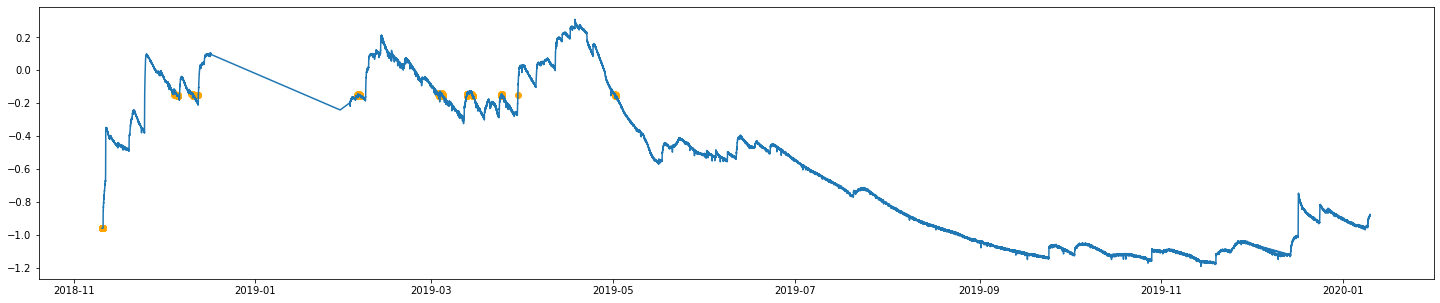

In [87]:
plt.figure(figsize=(25,5))
plt.plot(nocb['gwl'])
plt.scatter(df[df['gwl'].isnull()].index, inter_linear.loc[df[df['gwl'].isnull()].index]['gwl'], color='orange')

### Spline

In [103]:
inter_spline = df.interpolate(method='cubic')
inter_spline.isna().sum()

rain     0
soil     0
gwl     52
temp     0
dtype: int64

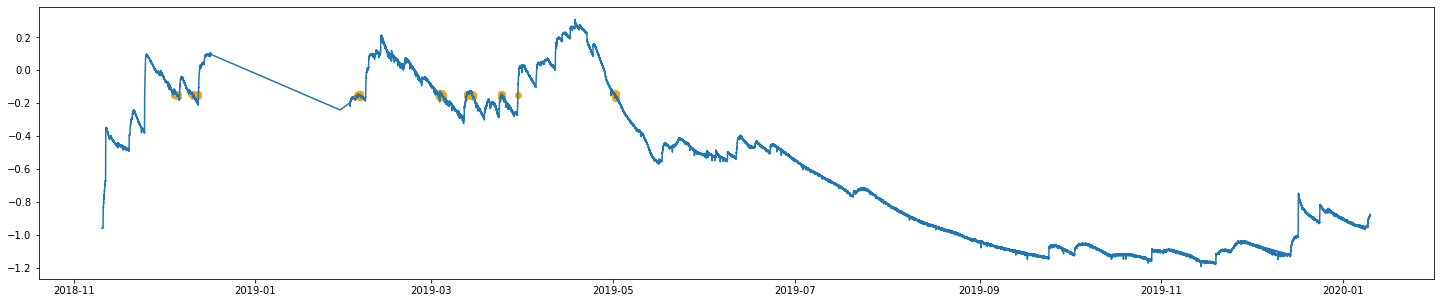

In [104]:
plt.figure(figsize=(25,5))
plt.plot(nocb['gwl'])
plt.scatter(df[df['gwl'].isnull()].index, inter_spline.loc[df[df['gwl'].isnull()].index]['gwl'], color='orange')

### Stineman

## Moving Average

## Simple MA

In [106]:
ma_simple = df.rolling(5, min_periods=1).mean()
ma_simple.isna().sum()

rain     0
soil     0
gwl     58
temp     0
dtype: int64

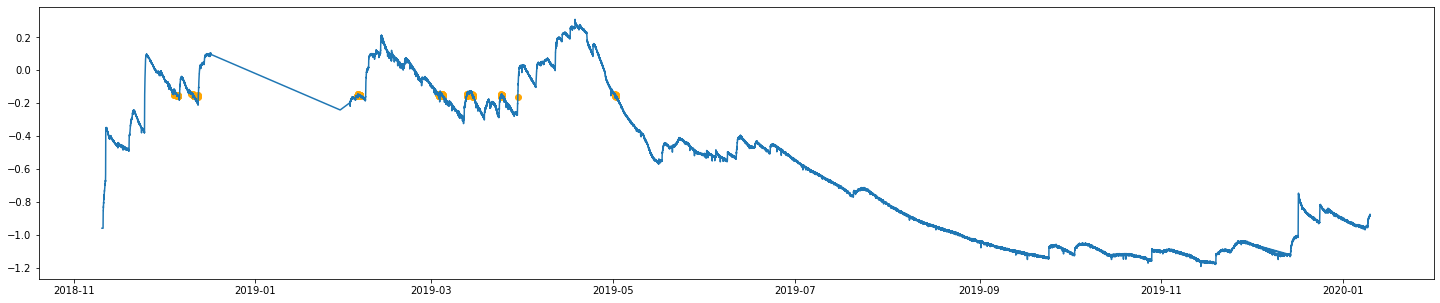

In [107]:
plt.figure(figsize=(25,5))
plt.plot(nocb['gwl'])
plt.scatter(df[df['gwl'].isnull()].index, ma_simple.loc[df[df['gwl'].isnull()].index]['gwl'], color='orange')

## Weighted MA

In [108]:
ma_linear = df.expanding(min_periods=1).mean()
df.isna().sum()

rain      3
soil      0
gwl     233
temp      0
dtype: int64

## Exponential WMA

In [109]:
ma_exp = df.ewm(alpha=0.1, adjust=False).mean()
ma_exp.isna().sum()

rain     0
soil     0
gwl     52
temp     0
dtype: int64

# KNN Imputer

In [111]:
from sklearn.impute import KNNImputer

impute = KNNImputer(n_neighbors=5)
knn_impute = impute.fit_transform(df)

knn = pd.DataFrame(knn_impute, columns=['rain', 'soil', 'gwl', 'temp'], index=df.index)
knn

,rain,soil,gwl,temp
date,,,,
2018-11-10 11:40:00,0.4,3.2,-1.1266,30.7
2018-11-10 11:50:00,0.0,3.2,-1.1266,30.7
2018-11-10 12:00:00,0.0,3.2,-1.1266,30.7
2018-11-10 12:10:00,0.0,3.2,-1.1100,31.1
2018-11-10 12:20:00,0.0,3.2,-1.1100,31.1
...,...,...,...,...
2020-01-10 02:00:00,0.0,29.0,-0.8760,29.5
2020-01-10 02:10:00,0.0,29.0,-0.8860,29.5
2020-01-10 02:20:00,0.0,29.0,-0.8810,29.5


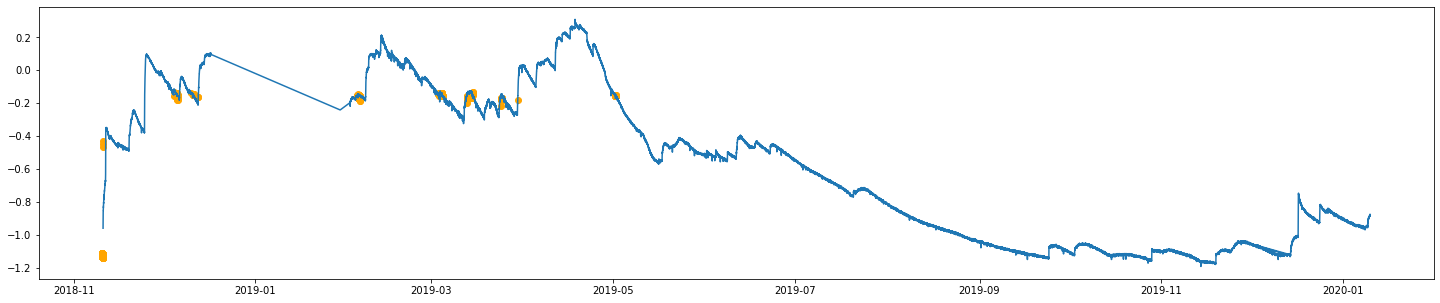

In [125]:
plt.figure(figsize=(25,5))
plt.plot(df['gwl'])
plt.scatter(df[df['gwl'].isnull()].index, knn.loc[df[df['gwl'].isnull()].index]['gwl'], color='orange')

In [127]:
knn.to_pickle("impute/" + location + "_knn.pkl")

# MICE (Test)

In [113]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = df

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

In [119]:
df_mice_imputed = df_mice_imputed.set_index(df.index)

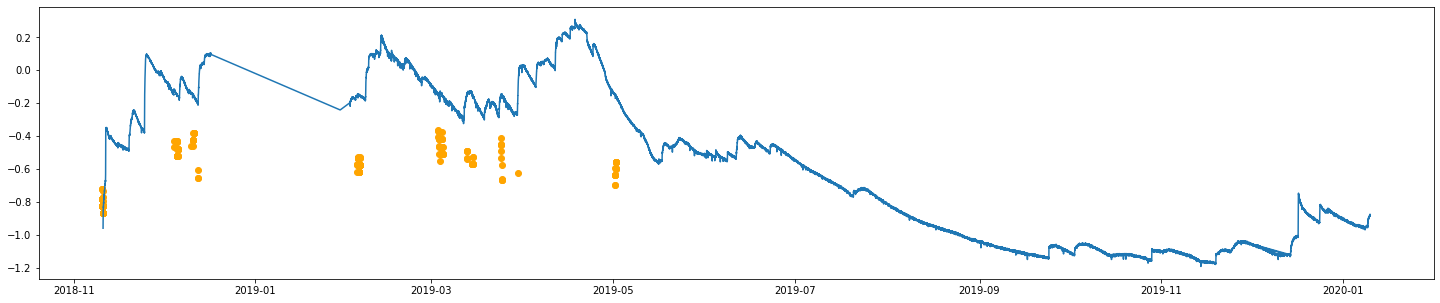

In [124]:
plt.figure(figsize=(25,5))
plt.plot(df['gwl'])
plt.scatter(df[df['gwl'].isnull()].index, df_mice_imputed.loc[df[df['gwl'].isnull()].index]['gwl'], color='orange')
# plt.plot(df_mice_imputed['gwl'])

,rain,soil,gwl,temp
date,,,,
2018-11-10 11:40:00,0.4,3.2,NaN,30.7
2018-11-10 11:50:00,0.0,3.2,NaN,30.7
2018-11-10 12:00:00,0.0,3.2,NaN,30.7
2018-11-10 12:10:00,0.0,3.2,NaN,31.1
2018-11-10 12:20:00,0.0,3.2,NaN,31.1
...,...,...,...,...
2020-01-10 02:00:00,0.0,29.0,-0.876,29.5
2020-01-10 02:10:00,0.0,29.0,-0.886,29.5
2020-01-10 02:20:00,0.0,29.0,-0.881,29.5
